In [1]:
# use R to change path to ~/cdai/SpliFi/analysis if current working path is not

setwd("~/cdai/SpliFi/analysis")


In [2]:
suppressMessages(library(tidyverse))
suppressMessages(library(glue))
suppressMessages(library(data.table))
suppressMessages(library(cowplot))

In [3]:
theme_set(theme_cowplot())

In [4]:
library(furrr)

plan(multisession, workers = 6)

Loading required package: future



In [5]:
options(repr.plot.width = 8, repr.plot.height=10, repr.plot.res = 180)

In [6]:
tissues  <- dir('../code/results/pheno/noisy/GTEx')
tissues  <- tissues[-which(tissues %in% c("Bladder", "Kidney-Medulla"))]
length(tissues)
tissues

[1] 48

[1] "Adipose-Subcutaneous"                
 [2] "Adipose-Visceral_Omentum_"           
 [3] "AdrenalGland"                        
 [4] "Artery-Aorta"                        
 [5] "Artery-Coronary"                     
 [6] "Artery-Tibial"                       
 [7] "Brain-Amygdala"                      
 [8] "Brain-Anteriorcingulatecortex_BA24_" 
 [9] "Brain-Caudate_basalganglia_"         
[10] "Brain-CerebellarHemisphere"          
[11] "Brain-Cerebellum"                    
[12] "Brain-Cortex"                        
[13] "Brain-FrontalCortex_BA9_"            
[14] "Brain-Hippocampus"                   
[15] "Brain-Hypothalamus"                  
[16] "Brain-Nucleusaccumbens_basalganglia_"
[17] "Brain-Putamen_basalganglia_"         
[18] "Brain-Spinalcord_cervicalc-1_"       
[19] "Brain-Substantianigra"               
[20] "Breast-MammaryTissue"                
[21] "Cells-Culturedfibroblasts"           
[22] "Cells-EBV-transformedlymphocytes"    
[23] "Colon-Sigmoid"                       
[24] "Colon-Transverse"                    
[25] "Esophagus-GastroesophagealJunction"  
[26] "Esophagus-Mucosa"                    
[27] "Esophagus-Muscularis"                
[28] "Heart-AtrialAppendage"               
[29] "Heart-LeftVentricle"                 
[30] "Liver"                               
[31] "Lung"                                
[32] "MinorSalivaryGland"                  
[33] "Muscle-Skeletal"                     
[34] "Nerve-Tibial"                        
[35] "Ovary"                               
[36] "Pancreas"                            
[37] "Pituitary"                           
[38] "Prostate"                            
[39] "Skin-NotSunExposed_Suprapubic_"      
[40] "Skin-SunExposed_Lowerleg_"           
[41] "SmallIntestine-TerminalIleum"        
[42] "Spleen"                              
[43] "Stomach"                             
[44] "Testis"                              
[45] "Thyroid"                             
[46] "Uterus"                              
[47] "Vagina"                              
[48] "WholeBlood"

In [7]:

computeUnprodRatio <- function(tissue_rds) {

    introns <- readRDS(tissue_rds)
    datacols <- names(introns)[5:ncol(introns)]
    # remove clu_type == N, clusters with only unproductive introns
    introns  <- introns[clu_type != 'N']
    # total reads (by sample)
    totals <- colSums(introns[, ..datacols])
    # unproudctive reads (by sample)
    unprod <- introns[intron_type == 'N', ..datacols] %>% colSums
    # unproductive reads / total reads
    if (all(names(totals) == names(unprod))) {
        unprod_ratio <- round(unprod / totals, 5)
    } else {
        stop('samples of totals and unprod are not the same')
    }

    return(unprod_ratio)

}

In [8]:
#tissues
tissues_rds <- glue('/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-{tissues}-allIntrons.rds')
names(tissues_rds) <- tissues
print(glue("{seq_along(tissues_rds)}:{tissues_rds}"))

1:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Adipose-Subcutaneous-allIntrons.rds
2:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Adipose-Visceral_Omentum_-allIntrons.rds
3:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-AdrenalGland-allIntrons.rds
4:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Artery-Aorta-allIntrons.rds
5:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Artery-Coronary-allIntrons.rds
6:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Artery-Tibial-allIntrons.rds
7:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Brain-Amygdala-allIntrons.rds
8:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Brain-Anteriorcingulatecortex_BA24_-allIntrons.rds
9:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Brain-Caudate_basalganglia_-allIntrons.rds
10:/project2/yangili1/cdai/SpliFi/data/data-for-2023-12-05-Notebook-Brain-Cerebe

In [11]:
ratios <- map(tissues_rds, computeUnprodRatio, .progress = TRUE)

 ■■                                 2% |  ETA:  4m

 ■■                                 4% |  ETA:  3m

 ■■■                                6% |  ETA:  3m

 ■■■                                8% |  ETA:  3m

 ■■■■■                             12% |  ETA:  2m

 ■■■■■■                            17% |  ETA:  2m

 ■■■■■■■                           19% |  ETA:  2m

 ■■■■■■■■                          23% |  ETA:  2m

 ■■■■■■■■■                         25% |  ETA:  2m

 ■■■■■■■■■■                        29% |  ETA:  1m

 ■■■■■■■■■■■                       33% |  ETA:  1m

 ■■■■■■■■■■■■                      38% |  ETA:  1m

 ■■■■■■■■■■■■■                     42% |  ETA:  1m

 ■■■■■■■■■■■■■■                    44% |  ETA:  1m

 ■■■■■■■■■■■■■■■                   48% |  ETA:  1m

 ■■■■■■■■■■■■■■■■                  50% |  ETA:  1m

 ■■■■■■■■■■■■■■■■■                 52% |  ETA:  1m

 ■■■■■■■■■■■■■■■■■                 54% |  ETA:  1m

 ■■■■■■■■■■■■■■■■■■                56% |  ETA:  1m

 ■■■■■■■■■■■

In [12]:
geuvadis <- list(EUR = computeUnprodRatio('../data/data-for-2023-11-30-Notebook-Geuvadis-EUR-allIntrons.rds'))

In [13]:
ratios  <- c(ratios, geuvadis)

In [15]:
ratios <- imap_dfr(
    ratios,
    \(x, y) enframe(x, "sample", "unprodRatio") %>% add_column(tissue = y)
)

In [16]:
ratios  <- as.data.table(ratios) %>%
    .[, .(sample, unprodRatio, nsample = uniqueN(sample)), by = tissue]

In [17]:
ratios %>% head

tissue,sample,unprodRatio,nsample
<chr>,<chr>,<dbl>,<int>
Adipose-Subcutaneous,GTEX-1117F,0.00652,663
Adipose-Subcutaneous,GTEX-111CU,0.00441,663
Adipose-Subcutaneous,GTEX-111FC,0.00527,663
Adipose-Subcutaneous,GTEX-111VG,0.00511,663
Adipose-Subcutaneous,GTEX-111YS,0.00552,663
Adipose-Subcutaneous,GTEX-1122O,0.00528,663


In [21]:
p1  <- ratios %>% 
    ggplot() + geom_boxplot(aes(x = forcats::fct_reorder(tissue, -unprodRatio), y = unprodRatio, col = tissue), width = .3) +
        scale_y_continuous(labels = scales::percent_format(accuracy = .1)) +
        labs(x = NULL, y = "Fraction of unproductive reads", 
             title = "Fraction of unproductive reads by tissue",
             subtitle = "clusters with ONLY unprod. introns are excluded from both numerators and denominators",
            ) +
        theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1))


In [22]:
p2 <- ratios[, .(nsample = uniqueN(sample)), by = tissue] %>% 
    ggplot() + geom_col(aes(x = forcats::fct_reorder(tissue, -nsample), y = nsample, fill = tissue), width = .3) +
        scale_y_continuous(labels = scales::comma_format()) +
        labs(x = NULL, y = "Number of samples", 
             title = "Number of samples by tissue",
            ) +
        theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1))

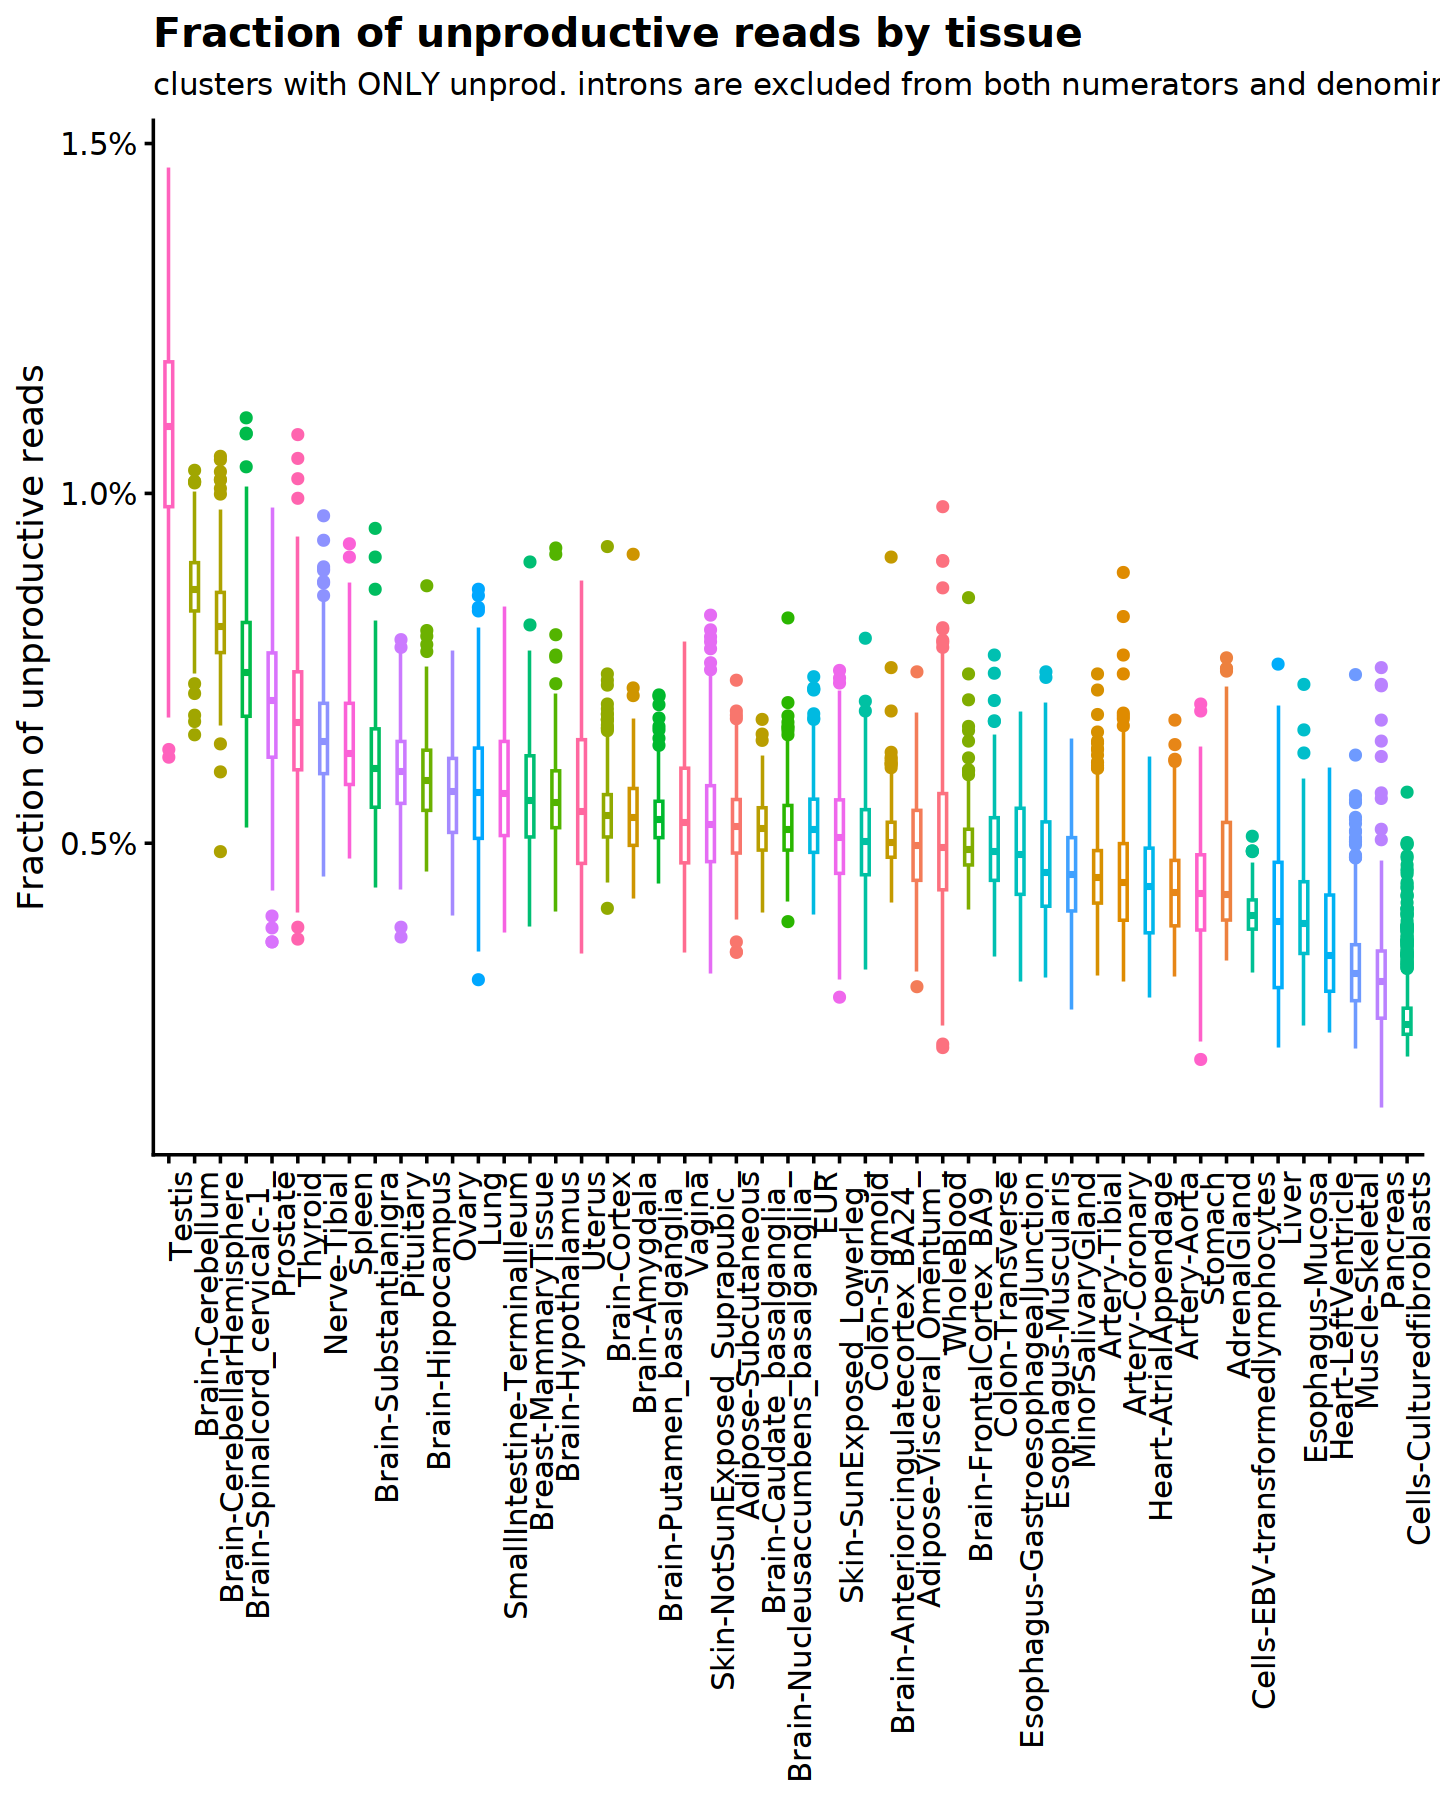

In [24]:
#| label: fig-unprodRatio-by-tissue
#| include: true
p1

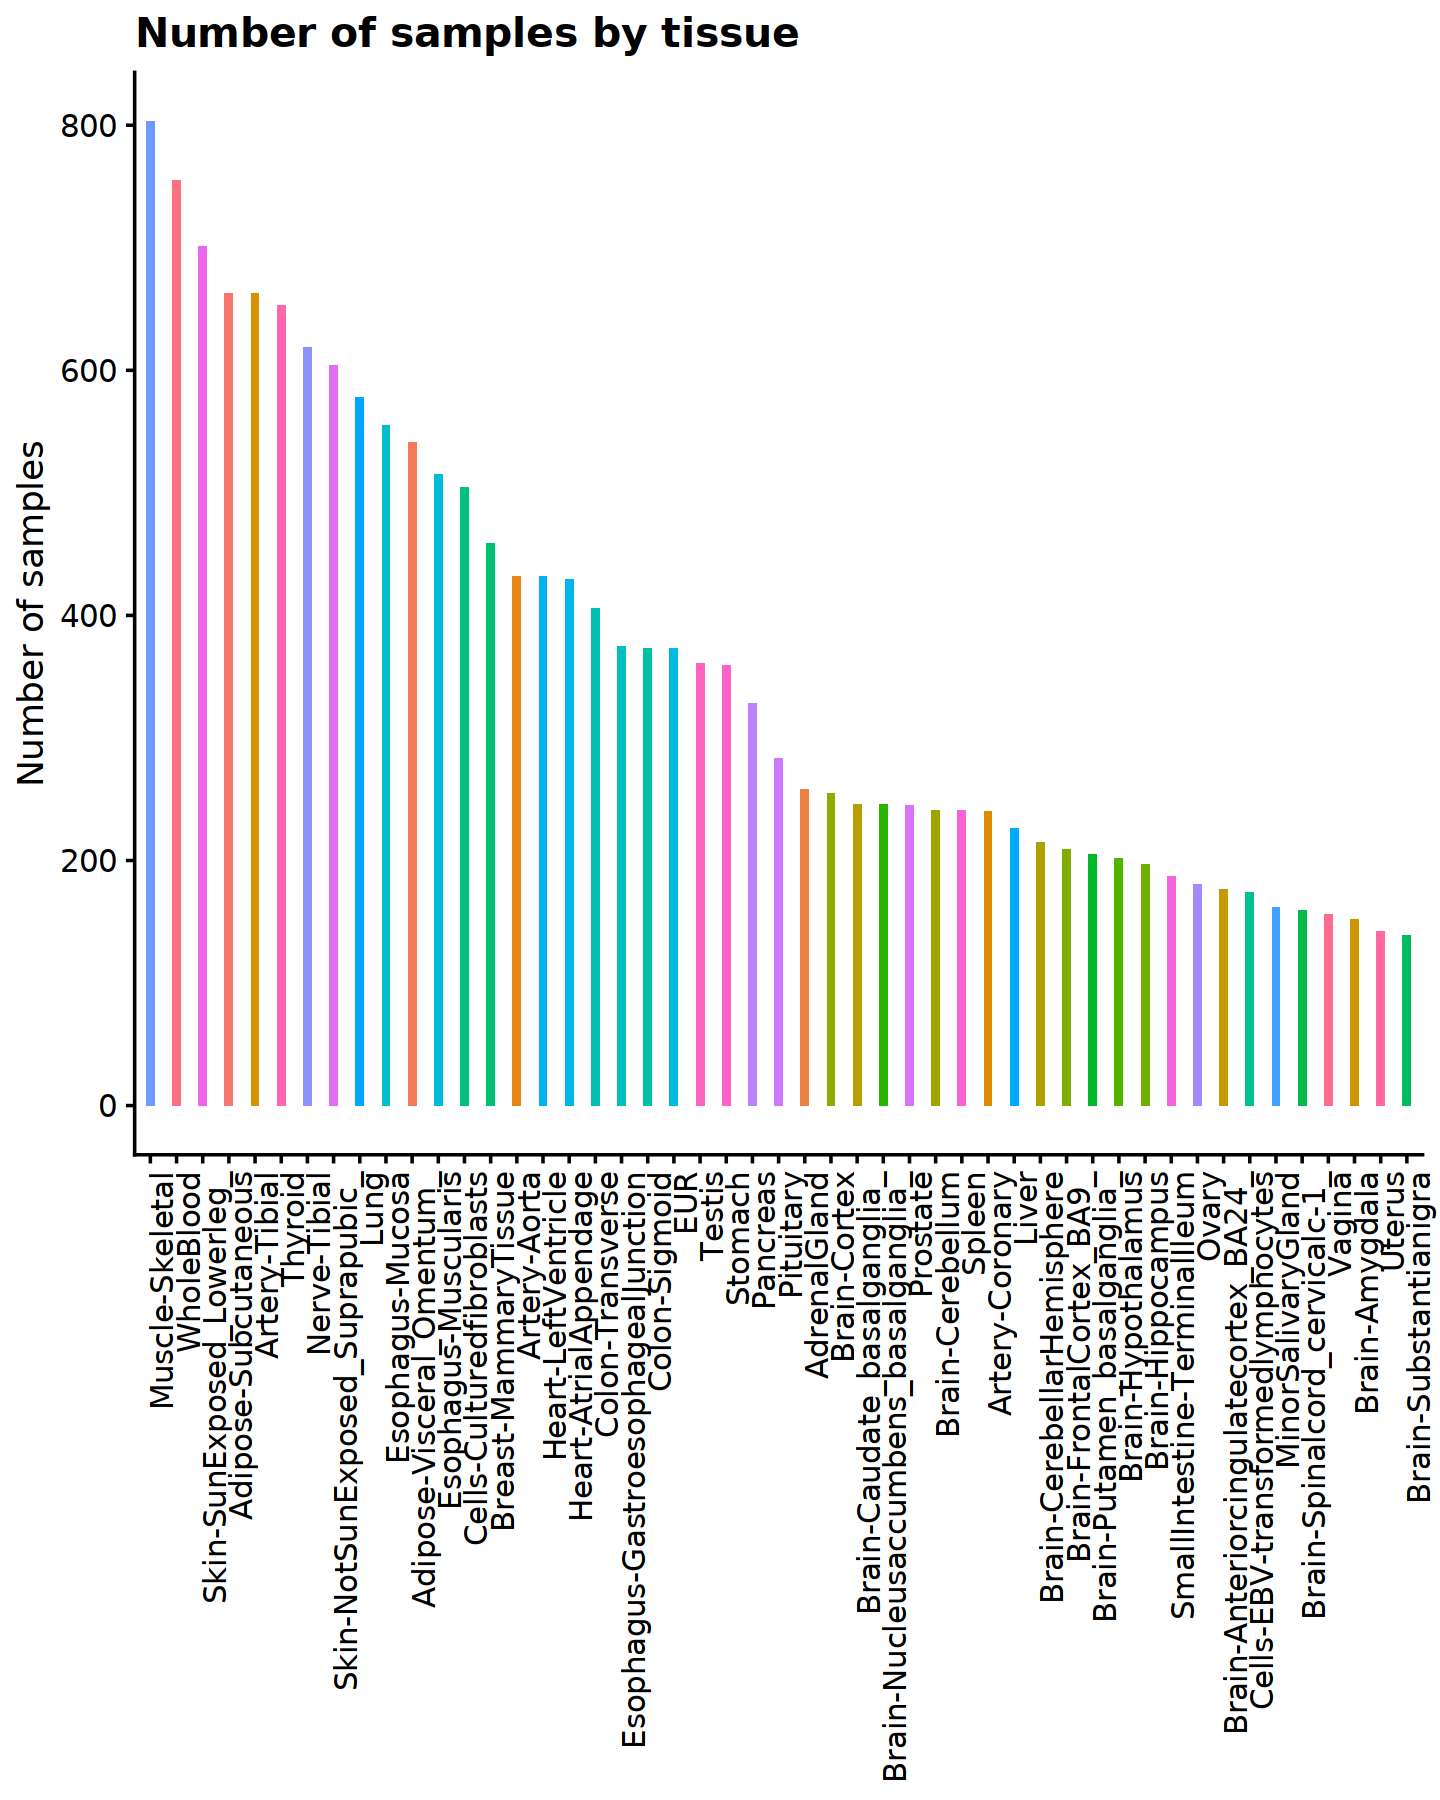

In [26]:
#| label: fig-nsample-by-tissue
#| include: true

p2